In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import bayesianoptimization as b
import tpeoptimization as t
from hyperopt import hp

import matplotlib.pyplot as plt

import os
os.environ['KBUCKET_CACHE_DIR'] = '/disk/scratch/mhennig/sha1-cache-mhennig'

from spikeforest import SFMdaRecordingExtractor, SFMdaSortingExtractor
from mountaintools import client as mt

# import a spike sorter from the spikesorters module of spikeforest
from spikesorters import Mountainsort4Sorter, HerdingspikesSorter
import shutil

# Configure to download from the public spikeforest kachery node
mt.configDownloadFrom('spikeforest.public')

import numpy as np


/disk/scratch/mhennig/miniconda3/envs/spikesorting/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/disk/scratch/mhennig/miniconda3/envs/spikesorting/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Load recording...


(-12.109856630824373,
 12.109856630824371,
 -15.415176600441502,
 323.4151766004415)

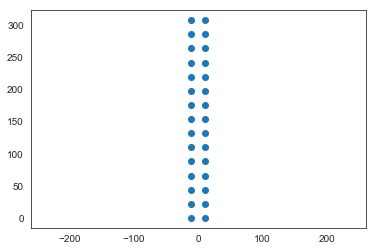

In [2]:
# SYNTH_VISAPY
# mea_c30 set 1
recdir = 'sha1dir://ed0fe4de4ef2c54b7c9de420c87f9df200721b24.synth_visapy/mea_c30/set1'

#synth_bionet_static static_8x_A_2A
# recdir = 'sha1dir://abc900f5cd62436e7c89d914c9f36dcd7fcca0e7.synth_bionet/bionet_static/static_8x_A_2A'

# synth_magland_noise10_K10_C4
# tetrode
# recdir = 'sha1dir://fb52d510d2543634e247e0d2d1d4390be9ed9e20.synth_magland/datasets_noise10_K10_C4/001_synth'

print('Load recording...')
recording = SFMdaRecordingExtractor(dataset_directory=recdir, download=True)
sorting_true = SFMdaSortingExtractor(firings_file=recdir + '/firings_true.mda')

cl=np.array(recording.get_channel_locations(recording.get_channel_ids()))
plt.figure()
plt.scatter(cl[:,0], cl[:,1])
plt.axis('equal')


In [3]:


sorter = 'herdingspikes'

space = {'clustering_bandwidth': hp.uniform('clustering_bandwidth', 3, 16),
    'clustering_alpha': hp.uniform('clustering_alpha', 3, 16),
    'detection_threshold': hp.qnormal('detection_threshold', 30, 10, 1),
    'ahpthr': hp.quniform('ahpthr', -30, 30, 1),
    'probe_inner_radius':hp.quniform('probe_inner_radius',60,100,1),
         'probe_neighbor_radius':hp.quniform('probe_neighbor_radius',70,120,1),
         'probe_event_length':hp.uniform('probe_event_length',0.1,0.3),
    'maa': hp.quniform('maa',0,10,1)
#     'pca_ncomponents': hp.quniform('pca_ncomponents', 1, 5, 1),
#          'filter':hp.choice('filter',['True','False']),
#          'pre_scale_value': hp.uniform('pre_scale_value',20,25)
        }

params = {     'clustering_bandwidth': (3., 16.),
                'clustering_alpha': (3., 16.),
               'detection_threshold': (10, 30),
              'probe_inner_radius': (60,100),
             'probe_neighbor_radius': (70,120),
              'probe_event_length': (0.1,0.3),
             'ahpthr': (-30, 30),
             'maa': (0,10)
#               'pca_ncomponents': (1, 4),
#            'pre_scale_value':(20.,21.),
#           'filter':(['True','False'])
                       } 


In [4]:
# test = b.BayesianOptimization(sorter=sorter, recording=recording, gt_sorting=sorting_true, params_to_opt=params, 
#                               run_schedule=[20, 20],
#                               metric ='accuracy', recdir = recdir, outfile = 'res')

test = t.TPEOptimization(sorter=sorter, recording=recording, gt_sorting=sorting_true, params_to_opt=params, 
                              space=space, run_schedule=[80, 80],
                              metric ='accuracy', recdir = recdir, outfile = 'res')



In [5]:
test.run()


chosen values:                                      
{'ahpthr': 24.0, 'clustering_alpha': 4.240405691413095, 'clustering_bandwidth': 11.380658854774673, 'detection_threshold': 34.0, 'maa': 5.0, 'probe_event_length': 0.2514567583367172, 'probe_inner_radius': 91.0, 'probe_neighbor_radius': 71.0}
Clustering spikes with parameters: {'ahpthr': 24.0, 'clustering_alpha': 4.240405691413095, 'clustering_bandwidth': 11.380658854774673, 'detection_threshold': 34.0, 'maa': 5.0, 'probe_event_length': 0.2514567583367172, 'probe_inner_radius': 91.0, 'probe_neighbor_radius': 71.0}
# Generating new position and neighbor files from data file
# Not Masking any Channels                          
# Sampling rate: 32000                              
# Localization On                                   
# Number of recorded channels: 30                   
# Analysing frames: 9600000; Seconds: 300.0         
# Frames before spike in cutout: 6                  
# Frames after spike in cutout: 32                

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    2.2s remaining:   15.1s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    2.3s remaining:    1.1s



Number of estimated units:                          
9                                                   
Saving to                                           
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_0/HS2_sorted.hdf5
  0%|          | 0/80 [00:18<?, ?it/s, best loss: ?]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    2.5s finished



score:                                              
-0.23567855180590497                                
chosen values:                                                                 
{'ahpthr': 28.0, 'clustering_alpha': 8.498688562966546, 'clustering_bandwidth': 4.614122989473965, 'detection_threshold': 27.0, 'maa': 1.0, 'probe_event_length': 0.24450613688676504, 'probe_inner_radius': 76.0, 'probe_neighbor_radius': 75.0}
Clustering spikes with parameters: {'ahpthr': 28.0, 'clustering_alpha': 8.498688562966546, 'clustering_bandwidth': 4.614122989473965, 'detection_threshold': 27.0, 'maa': 1.0, 'probe_event_length': 0.24450613688676504, 'probe_inner_radius': 76.0, 'probe_neighbor_radius': 75.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# Localization On                                      

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    2.4s remaining:   17.1s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    2.5s remaining:    1.3s



Number of estimated units:                                                     
13                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_1/HS2_sorted.hdf5
  1%|▏         | 1/80 [00:42<30:07, 22.88s/it, best loss: -0.23567855180590497]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    2.7s finished



score:                                                                         
-0.3183234883789961                                                            
chosen values:                                                                 
{'ahpthr': -28.0, 'clustering_alpha': 11.6844020228832, 'clustering_bandwidth': 12.747439253821693, 'detection_threshold': 46.0, 'maa': 7.0, 'probe_event_length': 0.1143373999318051, 'probe_inner_radius': 80.0, 'probe_neighbor_radius': 83.0}
Clustering spikes with parameters: {'ahpthr': -28.0, 'clustering_alpha': 11.6844020228832, 'clustering_bandwidth': 12.747439253821693, 'detection_threshold': 46.0, 'maa': 7.0, 'probe_event_length': 0.1143373999318051, 'probe_inner_radius': 80.0, 'probe_neighbor_radius': 83.0}
# Generating new position and neighbor files from data file                   
# Not Masking any Channels                                                    
# Sampling rate: 32000                                                        
# Lo

/disk/scratch/mhennig/miniconda3/envs/spikesorting/lib/python3.7/site-packages/herdingspikes/hs2.py:164: UserWarning: Loading an empty file /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_2/HS2_detected.bin . This usually happens when no spikes weredetected due to the detection parameters being set too strictly
  "strictly".format(file_name)



# Generating new position and neighbor files from data file                   
# Not Masking any Channels                                                    
# Sampling rate: 32000                                                        
# Localization On                                                             
# Number of recorded channels: 30                                             
# Analysing frames: 9600000; Seconds: 300.0                                   
# Frames before spike in cutout: 6                                            
# Frames after spike in cutout: 32                                            
# tcuts: 51 77                                                                
# tInc: 1000000                                                               
# Analysing frames from -51 to 1000077  (0.0%)                                
# Analysing frames from 999949 to 2000077  (10.4%)                            
# Analysing frames from 1999949 to 3000077  (20.8%) 

/disk/scratch/mhennig/miniconda3/envs/spikesorting/lib/python3.7/site-packages/herdingspikes/hs2.py:164: UserWarning: Loading an empty file /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_3/HS2_detected.bin . This usually happens when no spikes weredetected due to the detection parameters being set too strictly
  "strictly".format(file_name)



# Generating new position and neighbor files from data file                   
# Not Masking any Channels                                                    
# Sampling rate: 32000                                                        
# Localization On                                                             
# Number of recorded channels: 30                                             
# Analysing frames: 9600000; Seconds: 300.0                                   
# Frames before spike in cutout: 6                                            
# Frames after spike in cutout: 32                                            
# tcuts: 51 77                                                                
# tInc: 1000000                                                               
# Analysing frames from -51 to 1000077  (0.0%)                                
# Analysing frames from 999949 to 2000077  (10.4%)                            
# Analysing frames from 1999949 to 3000077  (20.8%) 

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    2.4s remaining:   16.8s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    2.5s remaining:    1.3s



Number of estimated units:                                                    
11                                                                            
Saving to                                                                     
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_4/HS2_sorted.hdf5
  5%|▌         | 4/80 [01:37<24:26, 19.29s/it, best loss: -0.3183234883789961]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    2.7s finished



score:                                                                        
-0.25118112518477725                                                          
chosen values:                                                                
{'ahpthr': -22.0, 'clustering_alpha': 10.84015576782199, 'clustering_bandwidth': 10.820012548399408, 'detection_threshold': 36.0, 'maa': 6.0, 'probe_event_length': 0.29487772704749105, 'probe_inner_radius': 62.0, 'probe_neighbor_radius': 101.0}
Clustering spikes with parameters: {'ahpthr': -22.0, 'clustering_alpha': 10.84015576782199, 'clustering_bandwidth': 10.820012548399408, 'detection_threshold': 36.0, 'maa': 6.0, 'probe_event_length': 0.29487772704749105, 'probe_inner_radius': 62.0, 'probe_neighbor_radius': 101.0}
# Generating new position and neighbor files from data file                   
# Not Masking any Channels                                                    
# Sampling rate: 32000                                                        
#

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    2.4s remaining:   16.7s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    2.5s remaining:    1.3s



sorter failed for these parameters                                            
chosen values:                                                                
{'ahpthr': -8.0, 'clustering_alpha': 7.365608504655338, 'clustering_bandwidth': 9.4414453194382, 'detection_threshold': 29.0, 'maa': 10.0, 'probe_event_length': 0.163807764898461, 'probe_inner_radius': 99.0, 'probe_neighbor_radius': 94.0}
Clustering spikes with parameters: {'ahpthr': -8.0, 'clustering_alpha': 7.365608504655338, 'clustering_bandwidth': 9.4414453194382, 'detection_threshold': 29.0, 'maa': 10.0, 'probe_event_length': 0.163807764898461, 'probe_inner_radius': 99.0, 'probe_neighbor_radius': 94.0}
  8%|▊         | 6/80 [02:00<24:47, 20.11s/it, best loss: -0.3183234883789961]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    2.6s finished



# Generating new position and neighbor files from data file                   
# Not Masking any Channels                                                    
# Sampling rate: 32000                                                        
# Localization On                                                             
# Number of recorded channels: 30                                             
# Analysing frames: 9600000; Seconds: 300.0                                   
# Frames before spike in cutout: 6                                            
# Frames after spike in cutout: 32                                            
# tcuts: 51 77                                                                
# tInc: 1000000                                                               
# Analysing frames from -51 to 1000077  (0.0%)                                
# Analysing frames from 999949 to 2000077  (10.4%)                            
# Analysing frames from 1999949 to 3000077  (20.8%) 

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    0.0s remaining:    0.3s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    0.1s remaining:    0.0s

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    0.1s finished



score:                                                                        
-0.14276298049555083                                                          
chosen values:                                                                
{'ahpthr': 3.0, 'clustering_alpha': 7.404208448276983, 'clustering_bandwidth': 5.245715822223604, 'detection_threshold': 41.0, 'maa': 0.0, 'probe_event_length': 0.28927071211799127, 'probe_inner_radius': 93.0, 'probe_neighbor_radius': 74.0}
Clustering spikes with parameters: {'ahpthr': 3.0, 'clustering_alpha': 7.404208448276983, 'clustering_bandwidth': 5.245715822223604, 'detection_threshold': 41.0, 'maa': 0.0, 'probe_event_length': 0.28927071211799127, 'probe_inner_radius': 93.0, 'probe_neighbor_radius': 74.0}
# Generating new position and neighbor files from data file                   
# Not Masking any Channels                                                    
# Sampling rate: 32000                                                        
# Localiz

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.



Number of estimated units:                                                    


[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    2.6s remaining:   18.0s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    2.7s remaining:    1.3s

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    2.8s finished



6
Saving to                                                                     
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_7/HS2_sorted.hdf5
score:                                                                        
-0.18606752401891397                                                          
chosen values:                                                                
{'ahpthr': -26.0, 'clustering_alpha': 3.3621155771676845, 'clustering_bandwidth': 9.153499259152863, 'detection_threshold': 23.0, 'maa': 5.0, 'probe_event_length': 0.13840688906348456, 'probe_inner_radius': 87.0, 'probe_neighbor_radius': 93.0}
Clustering spikes with parameters: {'ahpthr': -26.0, 'clustering_alpha': 3.3621155771676845, 'clustering_bandwidth': 9.153499259152863, 'detection_threshold': 23.0, 'maa': 5.0, 'probe_event_length': 0.13840688906348456, 'probe_inner_radius': 87.0, 'probe_neighbor_radius': 93.0}
# Generating new position and neighbor files from data file         

/disk/scratch/mhennig/miniconda3/envs/spikesorting/lib/python3.7/site-packages/herdingspikes/hs2.py:164: UserWarning: Loading an empty file /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_8/HS2_detected.bin . This usually happens when no spikes weredetected due to the detection parameters being set too strictly
  "strictly".format(file_name)



# Generating new position and neighbor files from data file                   
# Not Masking any Channels                                                    
# Sampling rate: 32000                                                        
# Localization On                                                             
# Number of recorded channels: 30                                             
# Analysing frames: 9600000; Seconds: 300.0                                   
# Frames before spike in cutout: 6                                            
# Frames after spike in cutout: 32                                            
# tcuts: 51 77                                                                
# tInc: 1000000                                                               
# Analysing frames from -51 to 1000077  (0.0%)                                
# Analysing frames from 999949 to 2000077  (10.4%)                            
# Analysing frames from 1999949 to 3000077  (20.8%) 

/disk/scratch/mhennig/miniconda3/envs/spikesorting/lib/python3.7/site-packages/herdingspikes/hs2.py:164: UserWarning: Loading an empty file /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_9/HS2_detected.bin . This usually happens when no spikes weredetected due to the detection parameters being set too strictly
  "strictly".format(file_name)



# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# Localization On                                                              
# Number of recorded channels: 30                                              
# Analysing frames: 9600000; Seconds: 300.0                                    
# Frames before spike in cutout: 6                                             
# Frames after spike in cutout: 32                                             
# tcuts: 51 77                                                                 
# tInc: 1000000                                                                
# Analysing frames from -51 to 1000077  (0.0%)                                 
# Analysing frames from 999949 to 2000077  (10.4%)                             
# Analysing frames from 1999949 to 30000

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    2.6s remaining:   18.4s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    2.7s remaining:    1.4s



Number of estimated units:                                                     
7                                                                              
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_10/HS2_sorted.hdf5
 12%|█▎        | 10/80 [03:36<21:35, 18.50s/it, best loss: -0.3183234883789961]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    2.8s finished



score:                                                                         
-0.1907255273690229                                                            
chosen values:                                                                 
{'ahpthr': 11.0, 'clustering_alpha': 8.23540568592734, 'clustering_bandwidth': 12.072723864772044, 'detection_threshold': 32.0, 'maa': 2.0, 'probe_event_length': 0.2701824579695975, 'probe_inner_radius': 81.0, 'probe_neighbor_radius': 105.0}
Clustering spikes with parameters: {'ahpthr': 11.0, 'clustering_alpha': 8.23540568592734, 'clustering_bandwidth': 12.072723864772044, 'detection_threshold': 32.0, 'maa': 2.0, 'probe_event_length': 0.2701824579695975, 'probe_inner_radius': 81.0, 'probe_neighbor_radius': 105.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
#

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    2.6s remaining:   17.9s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    2.7s remaining:    1.3s



Number of estimated units:                                                     
9                                                                              
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_11/HS2_sorted.hdf5
 14%|█▍        | 11/80 [03:59<23:01, 20.03s/it, best loss: -0.3183234883789961]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    2.8s finished



score:                                                                         
-0.2683438766288663                                                            
chosen values:                                                                 
{'ahpthr': -15.0, 'clustering_alpha': 7.2682958987512665, 'clustering_bandwidth': 6.83018720347297, 'detection_threshold': 43.0, 'maa': 7.0, 'probe_event_length': 0.1966304699153408, 'probe_inner_radius': 76.0, 'probe_neighbor_radius': 100.0}
Clustering spikes with parameters: {'ahpthr': -15.0, 'clustering_alpha': 7.2682958987512665, 'clustering_bandwidth': 6.83018720347297, 'detection_threshold': 43.0, 'maa': 7.0, 'probe_event_length': 0.1966304699153408, 'probe_inner_radius': 76.0, 'probe_neighbor_radius': 100.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    2.6s remaining:   18.0s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    2.7s remaining:    1.3s



Number of estimated units:                                                     
1                                                                              
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_12/HS2_sorted.hdf5
 15%|█▌        | 12/80 [04:23<23:57, 21.14s/it, best loss: -0.3183234883789961]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    2.8s finished



score:                                                                         
-0.0                                                                           
chosen values:                                                                 
{'ahpthr': -8.0, 'clustering_alpha': 9.437276898940716, 'clustering_bandwidth': 3.758880318986109, 'detection_threshold': 24.0, 'maa': 2.0, 'probe_event_length': 0.2995241353337791, 'probe_inner_radius': 87.0, 'probe_neighbor_radius': 92.0}
Clustering spikes with parameters: {'ahpthr': -8.0, 'clustering_alpha': 9.437276898940716, 'clustering_bandwidth': 3.758880318986109, 'detection_threshold': 24.0, 'maa': 2.0, 'probe_event_length': 0.2995241353337791, 'probe_inner_radius': 87.0, 'probe_neighbor_radius': 92.0}
 16%|█▋        | 13/80 [04:27<24:30, 21.95s/it, best loss: -0.3183234883789961]

/disk/scratch/mhennig/miniconda3/envs/spikesorting/lib/python3.7/site-packages/spiketoolkit/comparison/groundtruthcomparison.py:333: RuntimeWarning: invalid value encountered in long_scalars
  perf['precision'] = tp / (tp + fp)

/disk/scratch/mhennig/miniconda3/envs/spikesorting/lib/python3.7/site-packages/spiketoolkit/comparison/groundtruthcomparison.py:334: RuntimeWarning: invalid value encountered in long_scalars
  perf['false_discovery_rate'] = fp / (tp + fp)



# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# Localization On                                                              
# Number of recorded channels: 30                                              
# Analysing frames: 9600000; Seconds: 300.0                                    
# Frames before spike in cutout: 6                                             
# Frames after spike in cutout: 32                                             
# tcuts: 51 77                                                                 
# tInc: 1000000                                                                
# Analysing frames from -51 to 1000077  (0.0%)                                 
# Analysing frames from 999949 to 2000077  (10.4%)                             
# Analysing frames from 1999949 to 30000

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    2.7s remaining:   19.1s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    2.8s remaining:    1.4s



Number of estimated units:                                                     
10                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_13/HS2_sorted.hdf5
 16%|█▋        | 13/80 [04:47<24:30, 21.95s/it, best loss: -0.3183234883789961]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.0s finished



score:                                                                         
-0.14106280193236714                                                           
chosen values:                                                                 
{'ahpthr': 21.0, 'clustering_alpha': 3.9271848739171142, 'clustering_bandwidth': 6.4094314534145855, 'detection_threshold': 31.0, 'maa': 7.0, 'probe_event_length': 0.23030927161337086, 'probe_inner_radius': 65.0, 'probe_neighbor_radius': 119.0}
Clustering spikes with parameters: {'ahpthr': 21.0, 'clustering_alpha': 3.9271848739171142, 'clustering_bandwidth': 6.4094314534145855, 'detection_threshold': 31.0, 'maa': 7.0, 'probe_event_length': 0.23030927161337086, 'probe_inner_radius': 65.0, 'probe_neighbor_radius': 119.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                     

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    2.6s remaining:   18.5s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    2.8s remaining:    1.4s



Number of estimated units:                                                     
10                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_14/HS2_sorted.hdf5
 18%|█▊        | 14/80 [05:11<24:43, 22.47s/it, best loss: -0.3183234883789961]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    2.9s finished



score:                                                                         
-0.27385179579719426                                                           
chosen values:                                                                 
{'ahpthr': 13.0, 'clustering_alpha': 15.46093525771426, 'clustering_bandwidth': 13.833612644521162, 'detection_threshold': 17.0, 'maa': 5.0, 'probe_event_length': 0.28090606237114824, 'probe_inner_radius': 89.0, 'probe_neighbor_radius': 87.0}
Clustering spikes with parameters: {'ahpthr': 13.0, 'clustering_alpha': 15.46093525771426, 'clustering_bandwidth': 13.833612644521162, 'detection_threshold': 17.0, 'maa': 5.0, 'probe_event_length': 0.28090606237114824, 'probe_inner_radius': 89.0, 'probe_neighbor_radius': 87.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    2.9s remaining:   20.0s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.0s remaining:    1.5s



Number of estimated units:                                                     
11                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_15/HS2_sorted.hdf5
 19%|█▉        | 15/80 [05:36<24:50, 22.93s/it, best loss: -0.3183234883789961]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.1s finished



score:                                                                         
-0.4784771278143768                                                            
chosen values:                                                                 
{'ahpthr': -9.0, 'clustering_alpha': 10.127617105064317, 'clustering_bandwidth': 11.811290573718878, 'detection_threshold': 35.0, 'maa': 7.0, 'probe_event_length': 0.261523715353288, 'probe_inner_radius': 75.0, 'probe_neighbor_radius': 96.0}
Clustering spikes with parameters: {'ahpthr': -9.0, 'clustering_alpha': 10.127617105064317, 'clustering_bandwidth': 11.811290573718878, 'detection_threshold': 35.0, 'maa': 7.0, 'probe_event_length': 0.261523715353288, 'probe_inner_radius': 75.0, 'probe_neighbor_radius': 96.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
#

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    2.7s remaining:   19.0s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    2.8s remaining:    1.4s



Number of estimated units:                                                     
6                                                                              
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_16/HS2_sorted.hdf5
 20%|██        | 16/80 [06:00<25:15, 23.68s/it, best loss: -0.4784771278143768]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.0s finished



score:                                                                         
-0.0824642544058523                                                            
chosen values:                                                                 
{'ahpthr': 11.0, 'clustering_alpha': 11.344820292890391, 'clustering_bandwidth': 10.585497501870435, 'detection_threshold': 23.0, 'maa': 4.0, 'probe_event_length': 0.14279059913623784, 'probe_inner_radius': 76.0, 'probe_neighbor_radius': 76.0}
Clustering spikes with parameters: {'ahpthr': 11.0, 'clustering_alpha': 11.344820292890391, 'clustering_bandwidth': 10.585497501870435, 'detection_threshold': 23.0, 'maa': 4.0, 'probe_event_length': 0.14279059913623784, 'probe_inner_radius': 76.0, 'probe_neighbor_radius': 76.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                       

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    2.9s remaining:   20.1s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.0s remaining:    1.5s



Number of estimated units:                                                     
12                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_17/HS2_sorted.hdf5
 21%|██▏       | 17/80 [06:24<24:52, 23.69s/it, best loss: -0.4784771278143768]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.1s finished



score:                                                                         
-0.3506319744932817                                                            
chosen values:                                                                 
{'ahpthr': 10.0, 'clustering_alpha': 6.5003807195388115, 'clustering_bandwidth': 8.460881681640457, 'detection_threshold': 18.0, 'maa': 10.0, 'probe_event_length': 0.16814202711900875, 'probe_inner_radius': 89.0, 'probe_neighbor_radius': 111.0}
Clustering spikes with parameters: {'ahpthr': 10.0, 'clustering_alpha': 6.5003807195388115, 'clustering_bandwidth': 8.460881681640457, 'detection_threshold': 18.0, 'maa': 10.0, 'probe_event_length': 0.16814202711900875, 'probe_inner_radius': 89.0, 'probe_neighbor_radius': 111.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                     

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    2.9s remaining:   20.0s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.0s remaining:    1.5s



Number of estimated units:                                                     
13                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_18/HS2_sorted.hdf5
 22%|██▎       | 18/80 [06:49<24:45, 23.97s/it, best loss: -0.4784771278143768]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.1s finished



score:                                                                         
-0.4900321022957188                                                            
chosen values:                                                                 
{'ahpthr': -9.0, 'clustering_alpha': 13.60590030472804, 'clustering_bandwidth': 15.083444209485014, 'detection_threshold': 11.0, 'maa': 7.0, 'probe_event_length': 0.1372493075747312, 'probe_inner_radius': 96.0, 'probe_neighbor_radius': 81.0}
Clustering spikes with parameters: {'ahpthr': -9.0, 'clustering_alpha': 13.60590030472804, 'clustering_bandwidth': 15.083444209485014, 'detection_threshold': 11.0, 'maa': 7.0, 'probe_event_length': 0.1372493075747312, 'probe_inner_radius': 96.0, 'probe_neighbor_radius': 81.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
#

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    2.9s remaining:   20.4s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.0s remaining:    1.5s



Number of estimated units:                                                     
12                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_19/HS2_sorted.hdf5
 24%|██▍       | 19/80 [07:15<25:03, 24.65s/it, best loss: -0.4900321022957188]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.1s finished



score:                                                                         
-0.08467303275716186                                                           
chosen values:                                                                 
{'ahpthr': 12.0, 'clustering_alpha': 15.586238528231874, 'clustering_bandwidth': 7.779489337153245, 'detection_threshold': 17.0, 'maa': 10.0, 'probe_event_length': 0.18248371053968632, 'probe_inner_radius': 86.0, 'probe_neighbor_radius': 118.0}
Clustering spikes with parameters: {'ahpthr': 12.0, 'clustering_alpha': 15.586238528231874, 'clustering_bandwidth': 7.779489337153245, 'detection_threshold': 17.0, 'maa': 10.0, 'probe_event_length': 0.18248371053968632, 'probe_inner_radius': 86.0, 'probe_neighbor_radius': 118.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                     

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.4s remaining:   23.8s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.5s remaining:    1.8s



Number of estimated units:                                                     
15                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_20/HS2_sorted.hdf5
 25%|██▌       | 20/80 [07:41<24:30, 24.51s/it, best loss: -0.4900321022957188]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.8s finished



score:                                                                         
-0.7127958947194173                                                            
chosen values:                                                                 
{'ahpthr': 7.0, 'clustering_alpha': 5.932912265872798, 'clustering_bandwidth': 7.758639622677977, 'detection_threshold': -6.0, 'maa': 10.0, 'probe_event_length': 0.17954040385515255, 'probe_inner_radius': 84.0, 'probe_neighbor_radius': 120.0}
Clustering spikes with parameters: {'ahpthr': 7.0, 'clustering_alpha': 5.932912265872798, 'clustering_bandwidth': 7.758639622677977, 'detection_threshold': -6.0, 'maa': 10.0, 'probe_event_length': 0.17954040385515255, 'probe_inner_radius': 84.0, 'probe_neighbor_radius': 120.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.5s remaining:   24.7s



Number of estimated units:                                                     
22                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_21/HS2_sorted.hdf5
 26%|██▋       | 21/80 [08:10<24:40, 25.10s/it, best loss: -0.7127958947194173]

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.9s remaining:    1.9s

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.9s finished



score:                                                                         
-0.5160884329510105                                                            
chosen values:                                                                 
{'ahpthr': 3.0, 'clustering_alpha': 5.410598304920753, 'clustering_bandwidth': 7.196129877978214, 'detection_threshold': -25.0, 'maa': 9.0, 'probe_event_length': 0.21714630963038323, 'probe_inner_radius': 83.0, 'probe_neighbor_radius': 119.0}
Clustering spikes with parameters: {'ahpthr': 3.0, 'clustering_alpha': 5.410598304920753, 'clustering_bandwidth': 7.196129877978214, 'detection_threshold': -25.0, 'maa': 9.0, 'probe_event_length': 0.21714630963038323, 'probe_inner_radius': 83.0, 'probe_neighbor_radius': 119.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    4.0s remaining:   28.2s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.4s remaining:    2.2s

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.6s finished



Number of estimated units:                                                     
25                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_22/HS2_sorted.hdf5
score:                                                                         
-0.4871639241075443                                                            
chosen values:                                                                 
{'ahpthr': 30.0, 'clustering_alpha': 5.630834575787063, 'clustering_bandwidth': 3.0122370363547697, 'detection_threshold': -5.0, 'maa': 9.0, 'probe_event_length': 0.1828795020000783, 'probe_inner_radius': 71.0, 'probe_neighbor_radius': 114.0}
Clustering spikes with parameters: {'ahpthr': 30.0, 'clustering_alpha': 5.630834575787063, 'clustering_bandwidth': 3.0122370363547697, 'detection_threshold': -5.0, 'maa': 9.0, 'probe_ev

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    5.9s remaining:   41.3s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    6.2s remaining:    3.1s



Number of estimated units:                                                     
217                                                                            
 29%|██▉       | 23/80 [09:13<26:21, 27.74s/it, best loss: -0.7127958947194173]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    6.6s finished



Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_23/HS2_sorted.hdf5
score:                                                                         
-0.7254004576659039                                                            
chosen values:                                                                 
{'ahpthr': 28.0, 'clustering_alpha': 15.851166565296515, 'clustering_bandwidth': 3.296849843048215, 'detection_threshold': -3.0, 'maa': 9.0, 'probe_event_length': 0.18562831151915243, 'probe_inner_radius': 71.0, 'probe_neighbor_radius': 113.0}
Clustering spikes with parameters: {'ahpthr': 28.0, 'clustering_alpha': 15.851166565296515, 'clustering_bandwidth': 3.296849843048215, 'detection_threshold': -3.0, 'maa': 9.0, 'probe_event_length': 0.18562831151915243, 'probe_inner_radius': 71.0, 'probe_neighbor_radius': 113.0}
# Generating new position and neighbor files from data file      

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    4.7s remaining:   33.0s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    5.1s remaining:    2.5s

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    5.2s finished



Number of estimated units:                                                     
238                                                                            
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_24/HS2_sorted.hdf5
score:                                                                         
-0.0                                                                           
chosen values:                                                                 
{'ahpthr': 17.0, 'clustering_alpha': 12.458767713617059, 'clustering_bandwidth': 5.5114618188056115, 'detection_threshold': 4.0, 'maa': 9.0, 'probe_event_length': 0.21758068397202435, 'probe_inner_radius': 69.0, 'probe_neighbor_radius': 113.0}
Clustering spikes with parameters: {'ahpthr': 17.0, 'clustering_alpha': 12.458767713617059, 'clustering_bandwidth': 5.5114618188056115, 'detection_threshold': 4.0, 'maa': 9.0, 'probe_e

/disk/scratch/mhennig/miniconda3/envs/spikesorting/lib/python3.7/site-packages/spiketoolkit/comparison/groundtruthcomparison.py:333: RuntimeWarning: invalid value encountered in long_scalars
  perf['precision'] = tp / (tp + fp)

/disk/scratch/mhennig/miniconda3/envs/spikesorting/lib/python3.7/site-packages/spiketoolkit/comparison/groundtruthcomparison.py:334: RuntimeWarning: invalid value encountered in long_scalars
  perf['false_discovery_rate'] = fp / (tp + fp)



# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# Localization On                                                              
# Number of recorded channels: 30                                              
# Analysing frames: 9600000; Seconds: 300.0                                    
# Frames before spike in cutout: 6                                             
# Frames after spike in cutout: 32                                             
# tcuts: 51 77                                                                 
# tInc: 1000000                                                                
# Analysing frames from -51 to 1000077  (0.0%)                                 
# Analysing frames from 999949 to 2000077  (10.4%)                             
# Analysing frames from 1999949 to 30000

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    5.3s remaining:   36.8s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    5.6s remaining:    2.8s



Number of estimated units:                                                     
105                                                                            
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_25/HS2_sorted.hdf5
 31%|███▏      | 25/80 [10:15<27:12, 29.67s/it, best loss: -0.7254004576659039]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    5.8s finished



score:                                                                         
-0.7153132637191735                                                            
chosen values:                                                                 
{'ahpthr': 17.0, 'clustering_alpha': 12.886757748658553, 'clustering_bandwidth': 6.029391631052455, 'detection_threshold': -1.0, 'maa': 9.0, 'probe_event_length': 0.2179524222823757, 'probe_inner_radius': 71.0, 'probe_neighbor_radius': 114.0}
Clustering spikes with parameters: {'ahpthr': 17.0, 'clustering_alpha': 12.886757748658553, 'clustering_bandwidth': 6.029391631052455, 'detection_threshold': -1.0, 'maa': 9.0, 'probe_event_length': 0.2179524222823757, 'probe_inner_radius': 71.0, 'probe_neighbor_radius': 114.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    8.8s remaining:  1.0min

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    9.2s remaining:    4.6s



Number of estimated units:                                                     
82                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_26/HS2_sorted.hdf5
 32%|███▎      | 26/80 [10:51<27:07, 30.13s/it, best loss: -0.7254004576659039]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    9.7s finished



score:                                                                         
-0.6958774071060483                                                            
chosen values:                                                                 
{'ahpthr': 30.0, 'clustering_alpha': 12.021711677072513, 'clustering_bandwidth': 3.432069111180662, 'detection_threshold': 6.0, 'maa': 8.0, 'probe_event_length': 0.2126117665479118, 'probe_inner_radius': 68.0, 'probe_neighbor_radius': 109.0}
Clustering spikes with parameters: {'ahpthr': 30.0, 'clustering_alpha': 12.021711677072513, 'clustering_bandwidth': 3.432069111180662, 'detection_threshold': 6.0, 'maa': 8.0, 'probe_event_length': 0.2126117665479118, 'probe_inner_radius': 68.0, 'probe_neighbor_radius': 109.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
#

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    4.5s remaining:   31.2s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.9s remaining:    2.4s

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    5.1s finished



Number of estimated units:                                                     
98                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_27/HS2_sorted.hdf5
score:                                                                         
-0.3320862487505355                                                            
chosen values:                                                                 
{'ahpthr': 26.0, 'clustering_alpha': 14.245976351722438, 'clustering_bandwidth': 5.561145176699372, 'detection_threshold': 4.0, 'maa': 8.0, 'probe_event_length': 0.10584372528194556, 'probe_inner_radius': 60.0, 'probe_neighbor_radius': 106.0}
Clustering spikes with parameters: {'ahpthr': 26.0, 'clustering_alpha': 14.245976351722438, 'clustering_bandwidth': 5.561145176699372, 'detection_threshold': 4.0, 'maa': 8.0, 'probe_eve

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    7.0s remaining:   49.1s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    7.5s remaining:    3.7s



Number of estimated units:                                                     
154                                                                            
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_28/HS2_sorted.hdf5
 35%|███▌      | 28/80 [11:54<26:54, 31.05s/it, best loss: -0.7254004576659039]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    7.8s finished



score:                                                                         
-0.5747658371667683                                                            
chosen values:                                                                 
{'ahpthr': 23.0, 'clustering_alpha': 4.961095082130396, 'clustering_bandwidth': 4.49375517630502, 'detection_threshold': -12.0, 'maa': 8.0, 'probe_event_length': 0.22833848207767246, 'probe_inner_radius': 71.0, 'probe_neighbor_radius': 115.0}
Clustering spikes with parameters: {'ahpthr': 23.0, 'clustering_alpha': 4.961095082130396, 'clustering_bandwidth': 4.49375517630502, 'detection_threshold': -12.0, 'maa': 8.0, 'probe_event_length': 0.22833848207767246, 'probe_inner_radius': 71.0, 'probe_neighbor_radius': 115.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    7.9s remaining:   55.5s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    8.5s remaining:    4.2s



Number of estimated units:                                                     
79                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_29/HS2_sorted.hdf5
 36%|███▋      | 29/80 [12:29<27:03, 31.83s/it, best loss: -0.7254004576659039]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    8.8s finished



score:                                                                         
-0.707446391725651                                                             
chosen values:                                                                 
{'ahpthr': 24.0, 'clustering_alpha': 8.754122926652556, 'clustering_bandwidth': 4.004917928827599, 'detection_threshold': -11.0, 'maa': 6.0, 'probe_event_length': 0.23441908383260635, 'probe_inner_radius': 67.0, 'probe_neighbor_radius': 107.0}
Clustering spikes with parameters: {'ahpthr': 24.0, 'clustering_alpha': 8.754122926652556, 'clustering_bandwidth': 4.004917928827599, 'detection_threshold': -11.0, 'maa': 6.0, 'probe_event_length': 0.23441908383260635, 'probe_inner_radius': 67.0, 'probe_neighbor_radius': 107.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                       

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:   11.8s remaining:  1.4min

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:   12.4s remaining:    6.2s

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:   12.8s finished



Number of estimated units:                                                     
230                                                                            
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_30/HS2_sorted.hdf5
score:                                                                         
-0.39945034914046945                                                           
chosen values:                                                                 
{'ahpthr': 16.0, 'clustering_alpha': 14.661558016712442, 'clustering_bandwidth': 5.290057296743766, 'detection_threshold': 4.0, 'maa': 4.0, 'probe_event_length': 0.12433566885721511, 'probe_inner_radius': 68.0, 'probe_neighbor_radius': 116.0}
Clustering spikes with parameters: {'ahpthr': 16.0, 'clustering_alpha': 14.661558016712442, 'clustering_bandwidth': 5.290057296743766, 'detection_threshold': 4.0, 'maa': 4.0, 'probe_eve

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:   26.0s remaining:  3.0min

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:   27.5s remaining:   13.8s

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:   32.8s finished



Number of estimated units:                                                     
260                                                                            
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_31/HS2_sorted.hdf5
score:                                                                         
-0.21332907236861218                                                           
chosen values:                                                                 
{'ahpthr': 30.0, 'clustering_alpha': 12.361408314093145, 'clustering_bandwidth': 10.21873586295837, 'detection_threshold': -7.0, 'maa': 9.0, 'probe_event_length': 0.20483410523955523, 'probe_inner_radius': 72.0, 'probe_neighbor_radius': 110.0}
Clustering spikes with parameters: {'ahpthr': 30.0, 'clustering_alpha': 12.361408314093145, 'clustering_bandwidth': 10.21873586295837, 'detection_threshold': -7.0, 'maa': 9.0, 'probe_e

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    4.5s remaining:   31.7s



Number of estimated units:                                                     
26                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_32/HS2_sorted.hdf5
 40%|████      | 32/80 [14:48<35:35, 44.50s/it, best loss: -0.7254004576659039]

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.7s remaining:    2.4s

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.8s finished



score:                                                                         
-0.6183387913069366                                                            
chosen values:                                                                 
{'ahpthr': 6.0, 'clustering_alpha': 13.193196979066228, 'clustering_bandwidth': 5.913156214693663, 'detection_threshold': -16.0, 'maa': 6.0, 'probe_event_length': 0.15511224421738273, 'probe_inner_radius': 74.0, 'probe_neighbor_radius': 89.0}
Clustering spikes with parameters: {'ahpthr': 6.0, 'clustering_alpha': 13.193196979066228, 'clustering_bandwidth': 5.913156214693663, 'detection_threshold': -16.0, 'maa': 6.0, 'probe_event_length': 0.15511224421738273, 'probe_inner_radius': 74.0, 'probe_neighbor_radius': 89.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:   14.4s remaining:  1.7min

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:   14.9s remaining:    7.5s

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:   15.9s finished



Number of estimated units:                                                     
121                                                                            
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_33/HS2_sorted.hdf5
score:                                                                         
-0.48564084137206665                                                           
chosen values:                                                                 
{'ahpthr': 20.0, 'clustering_alpha': 9.115295825571195, 'clustering_bandwidth': 4.8049849520132275, 'detection_threshold': 10.0, 'maa': 8.0, 'probe_event_length': 0.19061179940988235, 'probe_inner_radius': 60.0, 'probe_neighbor_radius': 102.0}
Clustering spikes with parameters: {'ahpthr': 20.0, 'clustering_alpha': 9.115295825571195, 'clustering_bandwidth': 4.8049849520132275, 'detection_threshold': 10.0, 'maa': 8.0, 'probe_e

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    4.1s remaining:   28.6s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.2s remaining:    2.1s



Number of estimated units:                                                     
33                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_34/HS2_sorted.hdf5
 42%|████▎     | 34/80 [16:01<32:09, 41.94s/it, best loss: -0.7254004576659039]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.4s finished



score:                                                                         
-0.7743108569525026                                                            
chosen values:                                                                 
{'ahpthr': 21.0, 'clustering_alpha': 3.0910561329861697, 'clustering_bandwidth': 3.2645056219804562, 'detection_threshold': 13.0, 'maa': 8.0, 'probe_event_length': 0.1706445627765308, 'probe_inner_radius': 62.0, 'probe_neighbor_radius': 102.0}
Clustering spikes with parameters: {'ahpthr': 21.0, 'clustering_alpha': 3.0910561329861697, 'clustering_bandwidth': 3.2645056219804562, 'detection_threshold': 13.0, 'maa': 8.0, 'probe_event_length': 0.1706445627765308, 'probe_inner_radius': 62.0, 'probe_neighbor_radius': 102.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                       

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.5s remaining:   24.3s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.7s remaining:    1.8s

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.9s finished



Number of estimated units:                                                     
27                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_35/HS2_sorted.hdf5
score:                                                                         
-0.7707190612634739                                                            
chosen values:                                                                 
{'ahpthr': -3.0, 'clustering_alpha': 3.071691853753852, 'clustering_bandwidth': 3.0038501410376366, 'detection_threshold': 10.0, 'maa': 4.0, 'probe_event_length': 0.14663255444564532, 'probe_inner_radius': 60.0, 'probe_neighbor_radius': 102.0}
Clustering spikes with parameters: {'ahpthr': -3.0, 'clustering_alpha': 3.071691853753852, 'clustering_bandwidth': 3.0038501410376366, 'detection_threshold': 10.0, 'maa': 4.0, 'probe_e

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.9s remaining:   27.5s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.0s remaining:    2.0s



Number of estimated units:                                                     
63                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_36/HS2_sorted.hdf5
 45%|████▌     | 36/80 [16:57<25:23, 34.62s/it, best loss: -0.7743108569525026]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.2s finished



score:                                                                         
-0.7604543384499987                                                            
chosen values:                                                                 
{'ahpthr': 20.0, 'clustering_alpha': 4.700263469512542, 'clustering_bandwidth': 4.1320702860584975, 'detection_threshold': 11.0, 'maa': 8.0, 'probe_event_length': 0.12295458382415853, 'probe_inner_radius': 63.0, 'probe_neighbor_radius': 98.0}
Clustering spikes with parameters: {'ahpthr': 20.0, 'clustering_alpha': 4.700263469512542, 'clustering_bandwidth': 4.1320702860584975, 'detection_threshold': 11.0, 'maa': 8.0, 'probe_event_length': 0.12295458382415853, 'probe_inner_radius': 63.0, 'probe_neighbor_radius': 98.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.7s remaining:   25.7s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.8s remaining:    1.9s



Number of estimated units:                                                     
32                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_37/HS2_sorted.hdf5
 46%|████▋     | 37/80 [17:25<23:38, 32.98s/it, best loss: -0.7743108569525026]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.1s finished



score:                                                                         
-0.7690555927662425                                                            
chosen values:                                                                 
{'ahpthr': -2.0, 'clustering_alpha': 10.72928275804023, 'clustering_bandwidth': 4.902928536322268, 'detection_threshold': 9.0, 'maa': 6.0, 'probe_event_length': 0.16947127526771916, 'probe_inner_radius': 61.0, 'probe_neighbor_radius': 86.0}
Clustering spikes with parameters: {'ahpthr': -2.0, 'clustering_alpha': 10.72928275804023, 'clustering_bandwidth': 4.902928536322268, 'detection_threshold': 9.0, 'maa': 6.0, 'probe_event_length': 0.16947127526771916, 'probe_inner_radius': 61.0, 'probe_neighbor_radius': 86.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# L

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    4.5s remaining:   31.8s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.7s remaining:    2.4s



Number of estimated units:                                                     
49                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_38/HS2_sorted.hdf5
 48%|████▊     | 38/80 [17:55<21:58, 31.39s/it, best loss: -0.7743108569525026]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    5.0s finished



score:                                                                         
-0.7572828862469454                                                            
chosen values:                                                                 
{'ahpthr': 26.0, 'clustering_alpha': 3.8844362556098018, 'clustering_bandwidth': 13.430980845407, 'detection_threshold': 14.0, 'maa': 3.0, 'probe_event_length': 0.19371576608590046, 'probe_inner_radius': 65.0, 'probe_neighbor_radius': 103.0}
Clustering spikes with parameters: {'ahpthr': 26.0, 'clustering_alpha': 3.8844362556098018, 'clustering_bandwidth': 13.430980845407, 'detection_threshold': 14.0, 'maa': 3.0, 'probe_event_length': 0.19371576608590046, 'probe_inner_radius': 65.0, 'probe_neighbor_radius': 103.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
#

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.3s remaining:   22.9s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.4s remaining:    1.7s



Number of estimated units:                                                     
10                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_39/HS2_sorted.hdf5
 49%|████▉     | 39/80 [18:21<21:01, 30.76s/it, best loss: -0.7743108569525026]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.5s finished



score:                                                                         
-0.43713269791100795                                                           
chosen values:                                                                 
{'ahpthr': 8.0, 'clustering_alpha': 6.613719804531044, 'clustering_bandwidth': 6.867204050340559, 'detection_threshold': 8.0, 'maa': 6.0, 'probe_event_length': 0.1544686276038098, 'probe_inner_radius': 65.0, 'probe_neighbor_radius': 98.0}
Clustering spikes with parameters: {'ahpthr': 8.0, 'clustering_alpha': 6.613719804531044, 'clustering_bandwidth': 6.867204050340559, 'detection_threshold': 8.0, 'maa': 6.0, 'probe_event_length': 0.1544686276038098, 'probe_inner_radius': 65.0, 'probe_neighbor_radius': 98.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# Local

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.9s remaining:   27.2s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.0s remaining:    2.0s



Number of estimated units:                                                     
40                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_40/HS2_sorted.hdf5
 50%|█████     | 40/80 [18:49<19:41, 29.54s/it, best loss: -0.7743108569525026]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.1s finished



score:                                                                         
-0.7396875638145803                                                            
chosen values:                                                                 
{'ahpthr': 14.0, 'clustering_alpha': 8.327994020654604, 'clustering_bandwidth': 9.9705842864133, 'detection_threshold': 13.0, 'maa': 8.0, 'probe_event_length': 0.17338668783193728, 'probe_inner_radius': 79.0, 'probe_neighbor_radius': 90.0}
Clustering spikes with parameters: {'ahpthr': 14.0, 'clustering_alpha': 8.327994020654604, 'clustering_bandwidth': 9.9705842864133, 'detection_threshold': 13.0, 'maa': 8.0, 'probe_event_length': 0.17338668783193728, 'probe_inner_radius': 79.0, 'probe_neighbor_radius': 90.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# Loc

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.4s remaining:   23.6s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.5s remaining:    1.7s



Number of estimated units:                                                     
16                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_41/HS2_sorted.hdf5
 51%|█████▏    | 41/80 [19:16<18:54, 29.10s/it, best loss: -0.7743108569525026]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.6s finished



score:                                                                         
-0.567555544571584                                                             
chosen values:                                                                 
{'ahpthr': -18.0, 'clustering_alpha': 9.1928667797627, 'clustering_bandwidth': 8.62717452767797, 'detection_threshold': 14.0, 'maa': 7.0, 'probe_event_length': 0.2417888820551278, 'probe_inner_radius': 63.0, 'probe_neighbor_radius': 96.0}
Clustering spikes with parameters: {'ahpthr': -18.0, 'clustering_alpha': 9.1928667797627, 'clustering_bandwidth': 8.62717452767797, 'detection_threshold': 14.0, 'maa': 7.0, 'probe_event_length': 0.2417888820551278, 'probe_inner_radius': 63.0, 'probe_neighbor_radius': 96.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# Local

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.3s remaining:   23.0s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.3s remaining:    1.7s



Number of estimated units:                                                     
1                                                                              
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_42/HS2_sorted.hdf5
 52%|█████▎    | 42/80 [19:42<17:57, 28.37s/it, best loss: -0.7743108569525026]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.5s finished



score:                                                                         
-0.0                                                                           
chosen values:                                                                 
{'ahpthr': 22.0, 'clustering_alpha': 7.918436210898993, 'clustering_bandwidth': 4.706280042536314, 'detection_threshold': 27.0, 'maa': 10.0, 'probe_event_length': 0.10211544312660953, 'probe_inner_radius': 66.0, 'probe_neighbor_radius': 103.0}
Clustering spikes with parameters: {'ahpthr': 22.0, 'clustering_alpha': 7.918436210898993, 'clustering_bandwidth': 4.706280042536314, 'detection_threshold': 27.0, 'maa': 10.0, 'probe_event_length': 0.10211544312660953, 'probe_inner_radius': 66.0, 'probe_neighbor_radius': 103.0}
 54%|█████▍    | 43/80 [19:47<16:50, 27.30s/it, best loss: -0.7743108569525026]

/disk/scratch/mhennig/miniconda3/envs/spikesorting/lib/python3.7/site-packages/spiketoolkit/comparison/groundtruthcomparison.py:333: RuntimeWarning: invalid value encountered in long_scalars
  perf['precision'] = tp / (tp + fp)

/disk/scratch/mhennig/miniconda3/envs/spikesorting/lib/python3.7/site-packages/spiketoolkit/comparison/groundtruthcomparison.py:334: RuntimeWarning: invalid value encountered in long_scalars
  perf['false_discovery_rate'] = fp / (tp + fp)



# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# Localization On                                                              
# Number of recorded channels: 30                                              
# Analysing frames: 9600000; Seconds: 300.0                                    
# Frames before spike in cutout: 6                                             
# Frames after spike in cutout: 32                                             
# tcuts: 51 77                                                                 
# tInc: 1000000                                                                
# Analysing frames from -51 to 1000077  (0.0%)                                 
# Analysing frames from 999949 to 2000077  (10.4%)                             
# Analysing frames from 1999949 to 30000

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.4s remaining:   23.7s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.5s remaining:    1.7s



Number of estimated units:                                                     
14                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_43/HS2_sorted.hdf5
 54%|█████▍    | 43/80 [20:07<16:50, 27.30s/it, best loss: -0.7743108569525026]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.7s finished



score:                                                                         
-0.3219057822218254                                                            
chosen values:                                                                 
{'ahpthr': 27.0, 'clustering_alpha': 3.352645900154017, 'clustering_bandwidth': 7.560493576183126, 'detection_threshold': 8.0, 'maa': 5.0, 'probe_event_length': 0.13020220570635055, 'probe_inner_radius': 73.0, 'probe_neighbor_radius': 84.0}
Clustering spikes with parameters: {'ahpthr': 27.0, 'clustering_alpha': 3.352645900154017, 'clustering_bandwidth': 7.560493576183126, 'detection_threshold': 8.0, 'maa': 5.0, 'probe_event_length': 0.13020220570635055, 'probe_inner_radius': 73.0, 'probe_neighbor_radius': 84.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# L

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.6s remaining:   25.4s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.8s remaining:    1.9s



Number of estimated units:                                                     
18                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_44/HS2_sorted.hdf5
 55%|█████▌    | 44/80 [20:35<16:05, 26.81s/it, best loss: -0.7743108569525026]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.9s finished



score:                                                                         
-0.452203046132822                                                             
chosen values:                                                                 
{'ahpthr': 4.0, 'clustering_alpha': 10.343376114095772, 'clustering_bandwidth': 6.282490251579873, 'detection_threshold': 12.0, 'maa': 8.0, 'probe_event_length': 0.1139941991153196, 'probe_inner_radius': 62.0, 'probe_neighbor_radius': 92.0}
Clustering spikes with parameters: {'ahpthr': 4.0, 'clustering_alpha': 10.343376114095772, 'clustering_bandwidth': 6.282490251579873, 'detection_threshold': 12.0, 'maa': 8.0, 'probe_event_length': 0.1139941991153196, 'probe_inner_radius': 62.0, 'probe_neighbor_radius': 92.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# L

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    4.0s remaining:   28.2s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.2s remaining:    2.1s



Number of estimated units:                                                     
29                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_45/HS2_sorted.hdf5
 56%|█████▋    | 45/80 [21:03<15:57, 27.36s/it, best loss: -0.7743108569525026]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.3s finished



score:                                                                         
-0.7631416368959681                                                            
chosen values:                                                                 
{'ahpthr': -30.0, 'clustering_alpha': 11.324552078107068, 'clustering_bandwidth': 3.6499537484217677, 'detection_threshold': 6.0, 'maa': 3.0, 'probe_event_length': 0.2550210681877276, 'probe_inner_radius': 93.0, 'probe_neighbor_radius': 108.0}
Clustering spikes with parameters: {'ahpthr': -30.0, 'clustering_alpha': 11.324552078107068, 'clustering_bandwidth': 3.6499537484217677, 'detection_threshold': 6.0, 'maa': 3.0, 'probe_event_length': 0.2550210681877276, 'probe_inner_radius': 93.0, 'probe_neighbor_radius': 108.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                       

/disk/scratch/mhennig/miniconda3/envs/spikesorting/lib/python3.7/site-packages/herdingspikes/hs2.py:164: UserWarning: Loading an empty file /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_46/HS2_detected.bin . This usually happens when no spikes weredetected due to the detection parameters being set too strictly
  "strictly".format(file_name)



# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# Localization On                                                              
# Number of recorded channels: 30                                              
# Analysing frames: 9600000; Seconds: 300.0                                    
# Frames before spike in cutout: 6                                             
# Frames after spike in cutout: 32                                             
# tcuts: 51 77                                                                 
# tInc: 1000000                                                                
# Analysing frames from -51 to 1000077  (0.0%)                                 
# Analysing frames from 999949 to 2000077  (10.4%)                             
# Analysing frames from 1999949 to 30000

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.3s remaining:   23.3s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.4s remaining:    1.7s



Number of estimated units:                                                     
4                                                                              
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_47/HS2_sorted.hdf5
 59%|█████▉    | 47/80 [21:44<13:09, 23.91s/it, best loss: -0.7743108569525026]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.6s finished



score:                                                                         
-0.038704766366085025                                                          
chosen values:                                                                 
{'ahpthr': -5.0, 'clustering_alpha': 7.067778334925565, 'clustering_bandwidth': 11.33027977762656, 'detection_threshold': 37.0, 'maa': 7.0, 'probe_event_length': 0.2072218980968283, 'probe_inner_radius': 82.0, 'probe_neighbor_radius': 71.0}
Clustering spikes with parameters: {'ahpthr': -5.0, 'clustering_alpha': 7.067778334925565, 'clustering_bandwidth': 11.33027977762656, 'detection_threshold': 37.0, 'maa': 7.0, 'probe_event_length': 0.2072218980968283, 'probe_inner_radius': 82.0, 'probe_neighbor_radius': 71.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# L

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.3s remaining:   23.1s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.4s remaining:    1.7s



Number of estimated units:                                                     
6                                                                              
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_48/HS2_sorted.hdf5
 60%|██████    | 48/80 [22:10<12:51, 24.11s/it, best loss: -0.7743108569525026]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.7s finished



score:                                                                         
-0.22220577788302154                                                           
chosen values:                                                                 
{'ahpthr': -13.0, 'clustering_alpha': 7.8670224383075675, 'clustering_bandwidth': 4.231972904132267, 'detection_threshold': 21.0, 'maa': 10.0, 'probe_event_length': 0.1512235442283889, 'probe_inner_radius': 77.0, 'probe_neighbor_radius': 95.0}
Clustering spikes with parameters: {'ahpthr': -13.0, 'clustering_alpha': 7.8670224383075675, 'clustering_bandwidth': 4.231972904132267, 'detection_threshold': 21.0, 'maa': 10.0, 'probe_event_length': 0.1512235442283889, 'probe_inner_radius': 77.0, 'probe_neighbor_radius': 95.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                       

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.3s remaining:   22.9s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.3s remaining:    1.7s



Number of estimated units:                                                     
2                                                                              
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_49/HS2_sorted.hdf5
 61%|██████▏   | 49/80 [22:35<12:46, 24.72s/it, best loss: -0.7743108569525026]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.5s finished



score:                                                                         
-0.0                                                                           
chosen values:                                                                 
{'ahpthr': 9.0, 'clustering_alpha': 8.94407042633411, 'clustering_bandwidth': 8.392450161616924, 'detection_threshold': 28.0, 'maa': 3.0, 'probe_event_length': 0.16147991634953054, 'probe_inner_radius': 69.0, 'probe_neighbor_radius': 104.0}
Clustering spikes with parameters: {'ahpthr': 9.0, 'clustering_alpha': 8.94407042633411, 'clustering_bandwidth': 8.392450161616924, 'detection_threshold': 28.0, 'maa': 3.0, 'probe_event_length': 0.16147991634953054, 'probe_inner_radius': 69.0, 'probe_neighbor_radius': 104.0}
 62%|██████▎   | 50/80 [22:39<12:19, 24.64s/it, best loss: -0.7743108569525026]

/disk/scratch/mhennig/miniconda3/envs/spikesorting/lib/python3.7/site-packages/spiketoolkit/comparison/groundtruthcomparison.py:333: RuntimeWarning: invalid value encountered in long_scalars
  perf['precision'] = tp / (tp + fp)

/disk/scratch/mhennig/miniconda3/envs/spikesorting/lib/python3.7/site-packages/spiketoolkit/comparison/groundtruthcomparison.py:334: RuntimeWarning: invalid value encountered in long_scalars
  perf['false_discovery_rate'] = fp / (tp + fp)



# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# Localization On                                                              
# Number of recorded channels: 30                                              
# Analysing frames: 9600000; Seconds: 300.0                                    
# Frames before spike in cutout: 6                                             
# Frames after spike in cutout: 32                                             
# tcuts: 51 77                                                                 
# tInc: 1000000                                                                
# Analysing frames from -51 to 1000077  (0.0%)                                 
# Analysing frames from 999949 to 2000077  (10.4%)                             
# Analysing frames from 1999949 to 30000

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.3s remaining:   23.4s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.4s remaining:    1.7s



Number of estimated units:                                                     
13                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_50/HS2_sorted.hdf5
 62%|██████▎   | 50/80 [23:00<12:19, 24.64s/it, best loss: -0.7743108569525026]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.6s finished



score:                                                                         
-0.2850418410041841                                                            
chosen values:                                                                 
{'ahpthr': 15.0, 'clustering_alpha': 4.106662376710286, 'clustering_bandwidth': 9.002421103673736, 'detection_threshold': 25.0, 'maa': 5.0, 'probe_event_length': 0.27122482392777886, 'probe_inner_radius': 64.0, 'probe_neighbor_radius': 97.0}
Clustering spikes with parameters: {'ahpthr': 15.0, 'clustering_alpha': 4.106662376710286, 'clustering_bandwidth': 9.002421103673736, 'detection_threshold': 25.0, 'maa': 5.0, 'probe_event_length': 0.27122482392777886, 'probe_inner_radius': 64.0, 'probe_neighbor_radius': 97.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
#

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.4s remaining:   23.5s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.5s remaining:    1.7s



Number of estimated units:                                                     
11                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_51/HS2_sorted.hdf5
 64%|██████▍   | 51/80 [23:26<12:07, 25.07s/it, best loss: -0.7743108569525026]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.6s finished



score:                                                                         
-0.30442186688217976                                                           
chosen values:                                                                 
{'ahpthr': -0.0, 'clustering_alpha': 9.687059254538594, 'clustering_bandwidth': 6.744509055128008, 'detection_threshold': 16.0, 'maa': 7.0, 'probe_event_length': 0.17703203889232733, 'probe_inner_radius': 79.0, 'probe_neighbor_radius': 81.0}
Clustering spikes with parameters: {'ahpthr': -0.0, 'clustering_alpha': 9.687059254538594, 'clustering_bandwidth': 6.744509055128008, 'detection_threshold': 16.0, 'maa': 7.0, 'probe_event_length': 0.17703203889232733, 'probe_inner_radius': 79.0, 'probe_neighbor_radius': 81.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
#

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.6s remaining:   24.9s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.7s remaining:    1.9s



Number of estimated units:                                                     
21                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_52/HS2_sorted.hdf5
 65%|██████▌   | 52/80 [23:53<11:50, 25.39s/it, best loss: -0.7743108569525026]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.8s finished



score:                                                                         
-0.7458495821727019                                                            
chosen values:                                                                 
{'ahpthr': 5.0, 'clustering_alpha': 14.977816595813191, 'clustering_bandwidth': 4.97135949850312, 'detection_threshold': 33.0, 'maa': 0.0, 'probe_event_length': 0.2260513687880061, 'probe_inner_radius': 62.0, 'probe_neighbor_radius': 93.0}
Clustering spikes with parameters: {'ahpthr': 5.0, 'clustering_alpha': 14.977816595813191, 'clustering_bandwidth': 4.97135949850312, 'detection_threshold': 33.0, 'maa': 0.0, 'probe_event_length': 0.2260513687880061, 'probe_inner_radius': 62.0, 'probe_neighbor_radius': 93.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# Loc

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.6s remaining:   25.0s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.8s remaining:    1.9s



Number of estimated units:                                                     
10                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_53/HS2_sorted.hdf5
 66%|██████▋   | 53/80 [24:20<11:41, 25.98s/it, best loss: -0.7743108569525026]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.8s finished



score:                                                                         
-0.25127867675649807                                                           
chosen values:                                                                 
{'ahpthr': 25.0, 'clustering_alpha': 4.834860836542524, 'clustering_bandwidth': 3.012148856085, 'detection_threshold': 20.0, 'maa': 9.0, 'probe_event_length': 0.20184861795401973, 'probe_inner_radius': 60.0, 'probe_neighbor_radius': 111.0}
Clustering spikes with parameters: {'ahpthr': 25.0, 'clustering_alpha': 4.834860836542524, 'clustering_bandwidth': 3.012148856085, 'detection_threshold': 20.0, 'maa': 9.0, 'probe_event_length': 0.20184861795401973, 'probe_inner_radius': 60.0, 'probe_neighbor_radius': 111.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# Loc

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.9s remaining:   27.3s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.0s remaining:    2.0s

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.1s finished



Number of estimated units:                                                     
17                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_54/HS2_sorted.hdf5
score:                                                                         
-0.5784207916460054                                                            
chosen values:                                                                 
{'ahpthr': 21.0, 'clustering_alpha': 5.337941977170103, 'clustering_bandwidth': 9.64525259374044, 'detection_threshold': 30.0, 'maa': 4.0, 'probe_event_length': 0.18965373377109573, 'probe_inner_radius': 74.0, 'probe_neighbor_radius': 101.0}
Clustering spikes with parameters: {'ahpthr': 21.0, 'clustering_alpha': 5.337941977170103, 'clustering_bandwidth': 9.64525259374044, 'detection_threshold': 30.0, 'maa': 4.0, 'probe_event

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.5s remaining:   24.2s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s



Number of estimated units:                                                     
9                                                                              
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_55/HS2_sorted.hdf5
 69%|██████▉   | 55/80 [25:12<10:51, 26.05s/it, best loss: -0.7743108569525026]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.7s finished



score:                                                                         
-0.2770798355815435                                                            
chosen values:                                                                 
{'ahpthr': 19.0, 'clustering_alpha': 6.825841291807791, 'clustering_bandwidth': 8.044476020569403, 'detection_threshold': 10.0, 'maa': 2.0, 'probe_event_length': 0.13322066833548413, 'probe_inner_radius': 85.0, 'probe_neighbor_radius': 89.0}
Clustering spikes with parameters: {'ahpthr': 19.0, 'clustering_alpha': 6.825841291807791, 'clustering_bandwidth': 8.044476020569403, 'detection_threshold': 10.0, 'maa': 2.0, 'probe_event_length': 0.13322066833548413, 'probe_inner_radius': 85.0, 'probe_neighbor_radius': 89.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
#

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.7s remaining:   25.9s



Number of estimated units:                                                     
21                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_56/HS2_sorted.hdf5
 70%|███████   | 56/80 [25:39<10:26, 26.09s/it, best loss: -0.7743108569525026]

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.0s remaining:    2.0s

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.1s finished



score:                                                                         
-0.5171653543307086                                                            
chosen values:                                                                 
{'ahpthr': 13.0, 'clustering_alpha': 7.643147528404896, 'clustering_bandwidth': 7.1873141220067875, 'detection_threshold': 8.0, 'maa': 10.0, 'probe_event_length': 0.23845505512660306, 'probe_inner_radius': 90.0, 'probe_neighbor_radius': 105.0}
Clustering spikes with parameters: {'ahpthr': 13.0, 'clustering_alpha': 7.643147528404896, 'clustering_bandwidth': 7.1873141220067875, 'detection_threshold': 8.0, 'maa': 10.0, 'probe_event_length': 0.23845505512660306, 'probe_inner_radius': 90.0, 'probe_neighbor_radius': 105.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                       

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.7s remaining:   25.6s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.8s remaining:    1.9s



Number of estimated units:                                                     
26                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_57/HS2_sorted.hdf5
 71%|███████▏  | 57/80 [26:07<10:14, 26.70s/it, best loss: -0.7743108569525026]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.9s finished



score:                                                                         
-0.750828965664777                                                             
chosen values:                                                                 
{'ahpthr': -22.0, 'clustering_alpha': 3.671960195713085, 'clustering_bandwidth': 12.587880759319182, 'detection_threshold': 38.0, 'maa': 8.0, 'probe_event_length': 0.16421267484249374, 'probe_inner_radius': 81.0, 'probe_neighbor_radius': 99.0}
Clustering spikes with parameters: {'ahpthr': -22.0, 'clustering_alpha': 3.671960195713085, 'clustering_bandwidth': 12.587880759319182, 'detection_threshold': 38.0, 'maa': 8.0, 'probe_event_length': 0.16421267484249374, 'probe_inner_radius': 81.0, 'probe_neighbor_radius': 99.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                       

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.3s remaining:   22.9s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.4s remaining:    1.7s



sorter failed for these parameters                                             
chosen values:                                                                 
{'ahpthr': -12.0, 'clustering_alpha': 11.094836438942593, 'clustering_bandwidth': 3.846536583676078, 'detection_threshold': 6.0, 'maa': 6.0, 'probe_event_length': 0.14450138390191017, 'probe_inner_radius': 69.0, 'probe_neighbor_radius': 117.0}
Clustering spikes with parameters: {'ahpthr': -12.0, 'clustering_alpha': 11.094836438942593, 'clustering_bandwidth': 3.846536583676078, 'detection_threshold': 6.0, 'maa': 6.0, 'probe_event_length': 0.14450138390191017, 'probe_inner_radius': 69.0, 'probe_neighbor_radius': 117.0}
 74%|███████▍  | 59/80 [26:33<08:40, 24.79s/it, best loss: -0.7743108569525026]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.6s finished



# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# Localization On                                                              
# Number of recorded channels: 30                                              
# Analysing frames: 9600000; Seconds: 300.0                                    
# Frames before spike in cutout: 6                                             
# Frames after spike in cutout: 32                                             
# tcuts: 51 77                                                                 
# tInc: 1000000                                                                
# Analysing frames from -51 to 1000077  (0.0%)                                 
# Analysing frames from 999949 to 2000077  (10.4%)                             
# Analysing frames from 1999949 to 30000

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    0.0s remaining:    0.3s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    0.1s remaining:    0.0s

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    0.1s finished



score:                                                                         
-0.0                                                                           
chosen values:                                                                 
{'ahpthr': -6.0, 'clustering_alpha': 10.405730453639222, 'clustering_bandwidth': 11.29066420352589, 'detection_threshold': 15.0, 'maa': 1.0, 'probe_event_length': 0.2538363819642247, 'probe_inner_radius': 92.0, 'probe_neighbor_radius': 79.0}
Clustering spikes with parameters: {'ahpthr': -6.0, 'clustering_alpha': 10.405730453639222, 'clustering_bandwidth': 11.29066420352589, 'detection_threshold': 15.0, 'maa': 1.0, 'probe_event_length': 0.2538363819642247, 'probe_inner_radius': 92.0, 'probe_neighbor_radius': 79.0}
 75%|███████▌  | 60/80 [27:13<09:46, 29.32s/it, best loss: -0.7743108569525026]

/disk/scratch/mhennig/miniconda3/envs/spikesorting/lib/python3.7/site-packages/spiketoolkit/comparison/groundtruthcomparison.py:333: RuntimeWarning: invalid value encountered in long_scalars
  perf['precision'] = tp / (tp + fp)

/disk/scratch/mhennig/miniconda3/envs/spikesorting/lib/python3.7/site-packages/spiketoolkit/comparison/groundtruthcomparison.py:334: RuntimeWarning: invalid value encountered in long_scalars
  perf['false_discovery_rate'] = fp / (tp + fp)



# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# Localization On                                                              
# Number of recorded channels: 30                                              
# Analysing frames: 9600000; Seconds: 300.0                                    
# Frames before spike in cutout: 6                                             
# Frames after spike in cutout: 32                                             
# tcuts: 51 77                                                                 
# tInc: 1000000                                                                
# Analysing frames from -51 to 1000077  (0.0%)                                 
# Analysing frames from 999949 to 2000077  (10.4%)                             
# Analysing frames from 1999949 to 30000

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.5s remaining:   24.2s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.5s remaining:    1.8s



Number of estimated units:                                                     
13                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_60/HS2_sorted.hdf5
 75%|███████▌  | 60/80 [27:33<09:46, 29.32s/it, best loss: -0.7743108569525026]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.7s finished



score:                                                                         
-0.25843368349133145                                                           
chosen values:                                                                 
{'ahpthr': 29.0, 'clustering_alpha': 14.170143128058672, 'clustering_bandwidth': 14.82918342225333, 'detection_threshold': 7.0, 'maa': 9.0, 'probe_event_length': 0.29140437979907197, 'probe_inner_radius': 67.0, 'probe_neighbor_radius': 74.0}
Clustering spikes with parameters: {'ahpthr': 29.0, 'clustering_alpha': 14.170143128058672, 'clustering_bandwidth': 14.82918342225333, 'detection_threshold': 7.0, 'maa': 9.0, 'probe_event_length': 0.29140437979907197, 'probe_inner_radius': 67.0, 'probe_neighbor_radius': 74.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
#

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.5s remaining:   24.7s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.7s remaining:    1.8s



Number of estimated units:                                                     
15                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_61/HS2_sorted.hdf5
 76%|███████▋  | 61/80 [28:00<08:56, 28.22s/it, best loss: -0.7743108569525026]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.8s finished



score:                                                                         
-0.48905091807567463                                                           
chosen values:                                                                 
{'ahpthr': 2.0, 'clustering_alpha': 11.641875165448504, 'clustering_bandwidth': 5.816907404308449, 'detection_threshold': 22.0, 'maa': 7.0, 'probe_event_length': 0.11275874618793957, 'probe_inner_radius': 95.0, 'probe_neighbor_radius': 107.0}
Clustering spikes with parameters: {'ahpthr': 2.0, 'clustering_alpha': 11.641875165448504, 'clustering_bandwidth': 5.816907404308449, 'detection_threshold': 22.0, 'maa': 7.0, 'probe_event_length': 0.11275874618793957, 'probe_inner_radius': 95.0, 'probe_neighbor_radius': 107.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.9s remaining:   27.1s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.1s remaining:    2.0s



Number of estimated units:                                                     
16                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_62/HS2_sorted.hdf5
 78%|███████▊  | 62/80 [28:28<08:26, 28.14s/it, best loss: -0.7743108569525026]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.1s finished



score:                                                                         
-0.5150979994788801                                                            
chosen values:                                                                 
{'ahpthr': 11.0, 'clustering_alpha': 6.073203135001972, 'clustering_bandwidth': 3.3516941789283545, 'detection_threshold': 11.0, 'maa': 7.0, 'probe_event_length': 0.2219729035869133, 'probe_inner_radius': 61.0, 'probe_neighbor_radius': 91.0}
Clustering spikes with parameters: {'ahpthr': 11.0, 'clustering_alpha': 6.073203135001972, 'clustering_bandwidth': 3.3516941789283545, 'detection_threshold': 11.0, 'maa': 7.0, 'probe_event_length': 0.2219729035869133, 'probe_inner_radius': 61.0, 'probe_neighbor_radius': 91.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
#

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    4.2s remaining:   29.5s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.3s remaining:    2.2s



Number of estimated units:                                                     
34                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_63/HS2_sorted.hdf5
 79%|███████▉  | 63/80 [28:57<07:55, 27.99s/it, best loss: -0.7743108569525026]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.4s finished



score:                                                                         
-0.7841195938744601                                                            
chosen values:                                                                 
{'ahpthr': 18.0, 'clustering_alpha': 6.0379719015421625, 'clustering_bandwidth': 6.387284308067557, 'detection_threshold': 44.0, 'maa': 7.0, 'probe_event_length': 0.24809424457529367, 'probe_inner_radius': 88.0, 'probe_neighbor_radius': 84.0}
Clustering spikes with parameters: {'ahpthr': 18.0, 'clustering_alpha': 6.0379719015421625, 'clustering_bandwidth': 6.387284308067557, 'detection_threshold': 44.0, 'maa': 7.0, 'probe_event_length': 0.24809424457529367, 'probe_inner_radius': 88.0, 'probe_neighbor_radius': 84.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.3s remaining:   23.1s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.4s remaining:    1.7s



Number of estimated units:                                                     
6                                                                              
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_64/HS2_sorted.hdf5
 80%|████████  | 64/80 [29:24<07:34, 28.38s/it, best loss: -0.7841195938744601]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.5s finished



score:                                                                         
-0.13393801965230537                                                           
chosen values:                                                                 
{'ahpthr': 10.0, 'clustering_alpha': 5.654461981168046, 'clustering_bandwidth': 3.281144413484734, 'detection_threshold': 11.0, 'maa': 8.0, 'probe_event_length': 0.21259388215423003, 'probe_inner_radius': 61.0, 'probe_neighbor_radius': 94.0}
Clustering spikes with parameters: {'ahpthr': 10.0, 'clustering_alpha': 5.654461981168046, 'clustering_bandwidth': 3.281144413484734, 'detection_threshold': 11.0, 'maa': 8.0, 'probe_event_length': 0.21259388215423003, 'probe_inner_radius': 61.0, 'probe_neighbor_radius': 94.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
#

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    4.3s remaining:   29.9s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.4s remaining:    2.2s



Number of estimated units:                                                     
37                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_65/HS2_sorted.hdf5
 81%|████████▏ | 65/80 [29:53<06:55, 27.73s/it, best loss: -0.7841195938744601]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.6s finished



score:                                                                         
-0.7858588129496403                                                            
chosen values:                                                                 
{'ahpthr': 11.0, 'clustering_alpha': 4.425744139737493, 'clustering_bandwidth': 4.389042043080675, 'detection_threshold': 11.0, 'maa': 8.0, 'probe_event_length': 0.2243925527792866, 'probe_inner_radius': 61.0, 'probe_neighbor_radius': 87.0}
Clustering spikes with parameters: {'ahpthr': 11.0, 'clustering_alpha': 4.425744139737493, 'clustering_bandwidth': 4.389042043080675, 'detection_threshold': 11.0, 'maa': 8.0, 'probe_event_length': 0.2243925527792866, 'probe_inner_radius': 61.0, 'probe_neighbor_radius': 87.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# L

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.7s remaining:   26.2s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.9s remaining:    1.9s



Number of estimated units:                                                     
29                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_66/HS2_sorted.hdf5
 82%|████████▎ | 66/80 [30:21<06:35, 28.28s/it, best loss: -0.7858588129496403]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.0s finished



score:                                                                         
-0.78068163198427                                                              
chosen values:                                                                 
{'ahpthr': 12.0, 'clustering_alpha': 4.466913605100725, 'clustering_bandwidth': 4.417712390331785, 'detection_threshold': 11.0, 'maa': 6.0, 'probe_event_length': 0.28074193853716845, 'probe_inner_radius': 64.0, 'probe_neighbor_radius': 87.0}
Clustering spikes with parameters: {'ahpthr': 12.0, 'clustering_alpha': 4.466913605100725, 'clustering_bandwidth': 4.417712390331785, 'detection_threshold': 11.0, 'maa': 6.0, 'probe_event_length': 0.28074193853716845, 'probe_inner_radius': 64.0, 'probe_neighbor_radius': 87.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
#

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.9s remaining:   27.4s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.1s remaining:    2.1s

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.3s finished



Number of estimated units:                                                     
35                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_67/HS2_sorted.hdf5
score:                                                                         
-0.7765914092428071                                                            
chosen values:                                                                 
{'ahpthr': 7.0, 'clustering_alpha': 5.274486241885606, 'clustering_bandwidth': 3.474044991676847, 'detection_threshold': 12.0, 'maa': 5.0, 'probe_event_length': 0.26279317830951826, 'probe_inner_radius': 61.0, 'probe_neighbor_radius': 91.0}
Clustering spikes with parameters: {'ahpthr': 7.0, 'clustering_alpha': 5.274486241885606, 'clustering_bandwidth': 3.474044991676847, 'detection_threshold': 12.0, 'maa': 5.0, 'probe_event_

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    4.2s remaining:   29.1s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.3s remaining:    2.1s



Number of estimated units:                                                     
29                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_68/HS2_sorted.hdf5
 85%|████████▌ | 68/80 [31:21<05:47, 28.95s/it, best loss: -0.7858588129496403]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.4s finished



score:                                                                         
-0.7815466219988833                                                            
chosen values:                                                                 
{'ahpthr': -2.0, 'clustering_alpha': 5.310971680178178, 'clustering_bandwidth': 3.5435861762747045, 'detection_threshold': 12.0, 'maa': 5.0, 'probe_event_length': 0.2818050605190332, 'probe_inner_radius': 67.0, 'probe_neighbor_radius': 90.0}
Clustering spikes with parameters: {'ahpthr': -2.0, 'clustering_alpha': 5.310971680178178, 'clustering_bandwidth': 3.5435861762747045, 'detection_threshold': 12.0, 'maa': 5.0, 'probe_event_length': 0.2818050605190332, 'probe_inner_radius': 67.0, 'probe_neighbor_radius': 90.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
#

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    4.2s remaining:   29.3s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.3s remaining:    2.2s



Number of estimated units:                                                     
32                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_69/HS2_sorted.hdf5
                                                                               

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.4s finished



score:                                                                         
-0.7778238972826388                                                            
chosen values:                                                                 
{'ahpthr': 7.0, 'clustering_alpha': 5.87809994992489, 'clustering_bandwidth': 5.18496261168206, 'detection_threshold': 12.0, 'maa': 4.0, 'probe_event_length': 0.26305021726450784, 'probe_inner_radius': 66.0, 'probe_neighbor_radius': 94.0}
Clustering spikes with parameters: {'ahpthr': 7.0, 'clustering_alpha': 5.87809994992489, 'clustering_bandwidth': 5.18496261168206, 'detection_threshold': 12.0, 'maa': 4.0, 'probe_event_length': 0.26305021726450784, 'probe_inner_radius': 66.0, 'probe_neighbor_radius': 94.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# Local

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.7s remaining:   26.0s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.9s remaining:    1.9s



Number of estimated units:                                                     
28                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_70/HS2_sorted.hdf5
 88%|████████▊ | 70/80 [32:17<04:48, 28.82s/it, best loss: -0.7858588129496403]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.0s finished



score:                                                                         
-0.7761931034482759                                                            
chosen values:                                                                 
{'ahpthr': 9.0, 'clustering_alpha': 6.908347999893259, 'clustering_bandwidth': 5.657989593884995, 'detection_threshold': 9.0, 'maa': 4.0, 'probe_event_length': 0.27026604347833305, 'probe_inner_radius': 70.0, 'probe_neighbor_radius': 82.0}
Clustering spikes with parameters: {'ahpthr': 9.0, 'clustering_alpha': 6.908347999893259, 'clustering_bandwidth': 5.657989593884995, 'detection_threshold': 9.0, 'maa': 4.0, 'probe_event_length': 0.27026604347833305, 'probe_inner_radius': 70.0, 'probe_neighbor_radius': 82.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# Loc

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    4.2s remaining:   29.7s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.4s remaining:    2.2s



Number of estimated units:                                                     
49                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_71/HS2_sorted.hdf5
 89%|████████▉ | 71/80 [32:46<04:16, 28.54s/it, best loss: -0.7858588129496403]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.5s finished



score:                                                                         
-0.7488952776446787                                                            
chosen values:                                                                 
{'ahpthr': 2.0, 'clustering_alpha': 5.101803567964879, 'clustering_bandwidth': 3.2862485171192595, 'detection_threshold': 13.0, 'maa': 5.0, 'probe_event_length': 0.21069456376557363, 'probe_inner_radius': 64.0, 'probe_neighbor_radius': 79.0}
Clustering spikes with parameters: {'ahpthr': 2.0, 'clustering_alpha': 5.101803567964879, 'clustering_bandwidth': 3.2862485171192595, 'detection_threshold': 13.0, 'maa': 5.0, 'probe_event_length': 0.21069456376557363, 'probe_inner_radius': 64.0, 'probe_neighbor_radius': 79.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
#

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    4.1s remaining:   28.8s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.3s remaining:    2.1s



Number of estimated units:                                                     
30                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_72/HS2_sorted.hdf5
 90%|█████████ | 72/80 [33:14<03:49, 28.71s/it, best loss: -0.7858588129496403]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.4s finished



score:                                                                         
-0.7875291932806213                                                            
chosen values:                                                                 
{'ahpthr': 1.0, 'clustering_alpha': 6.331019758532885, 'clustering_bandwidth': 3.930686895050423, 'detection_threshold': 13.0, 'maa': 3.0, 'probe_event_length': 0.21309404784593308, 'probe_inner_radius': 66.0, 'probe_neighbor_radius': 77.0}
Clustering spikes with parameters: {'ahpthr': 1.0, 'clustering_alpha': 6.331019758532885, 'clustering_bandwidth': 3.930686895050423, 'detection_threshold': 13.0, 'maa': 3.0, 'probe_event_length': 0.21309404784593308, 'probe_inner_radius': 66.0, 'probe_neighbor_radius': 77.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# L

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    4.0s remaining:   28.1s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.2s remaining:    2.1s



Number of estimated units:                                                     
29                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_73/HS2_sorted.hdf5
 91%|█████████▏| 73/80 [33:42<03:19, 28.53s/it, best loss: -0.7875291932806213]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.3s finished



score:                                                                         
-0.779721823600839                                                             
chosen values:                                                                 
{'ahpthr': -5.0, 'clustering_alpha': 8.563317017448393, 'clustering_bandwidth': 3.1267797936282244, 'detection_threshold': 9.0, 'maa': 6.0, 'probe_event_length': 0.23375553185648143, 'probe_inner_radius': 64.0, 'probe_neighbor_radius': 74.0}
Clustering spikes with parameters: {'ahpthr': -5.0, 'clustering_alpha': 8.563317017448393, 'clustering_bandwidth': 3.1267797936282244, 'detection_threshold': 9.0, 'maa': 6.0, 'probe_event_length': 0.23375553185648143, 'probe_inner_radius': 64.0, 'probe_neighbor_radius': 74.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
#

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    4.3s remaining:   30.1s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.4s remaining:    2.2s



Number of estimated units:                                                     
35                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_74/HS2_sorted.hdf5
 92%|█████████▎| 74/80 [34:10<02:50, 28.39s/it, best loss: -0.7875291932806213]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.5s finished



score:                                                                         
-0.443910437634287                                                             
chosen values:                                                                 
{'ahpthr': 3.0, 'clustering_alpha': 7.4314485255537805, 'clustering_bandwidth': 5.264557994602223, 'detection_threshold': 10.0, 'maa': 7.0, 'probe_event_length': 0.20883010442564595, 'probe_inner_radius': 72.0, 'probe_neighbor_radius': 79.0}
Clustering spikes with parameters: {'ahpthr': 3.0, 'clustering_alpha': 7.4314485255537805, 'clustering_bandwidth': 5.264557994602223, 'detection_threshold': 10.0, 'maa': 7.0, 'probe_event_length': 0.20883010442564595, 'probe_inner_radius': 72.0, 'probe_neighbor_radius': 79.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
#

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    4.0s remaining:   28.1s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.1s remaining:    2.1s



Number of estimated units:                                                     
30                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_75/HS2_sorted.hdf5
 94%|█████████▍| 75/80 [34:38<02:20, 28.14s/it, best loss: -0.7875291932806213]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.2s finished



score:                                                                         
-0.7687050847457627                                                            
chosen values:                                                                 
{'ahpthr': -11.0, 'clustering_alpha': 3.4074935254205316, 'clustering_bandwidth': 6.7885358524380965, 'detection_threshold': 1.0, 'maa': 5.0, 'probe_event_length': 0.19833737450139755, 'probe_inner_radius': 68.0, 'probe_neighbor_radius': 85.0}
Clustering spikes with parameters: {'ahpthr': -11.0, 'clustering_alpha': 3.4074935254205316, 'clustering_bandwidth': 6.7885358524380965, 'detection_threshold': 1.0, 'maa': 5.0, 'probe_event_length': 0.19833737450139755, 'probe_inner_radius': 68.0, 'probe_neighbor_radius': 85.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                       

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.4s remaining:   23.9s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.5s remaining:    1.8s



Number of estimated units:                                                     
12                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_76/HS2_sorted.hdf5
 95%|█████████▌| 76/80 [35:06<01:52, 28.03s/it, best loss: -0.7875291932806213]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.7s finished



score:                                                                         
-0.04455445544554455                                                           
chosen values:                                                                 
{'ahpthr': 5.0, 'clustering_alpha': 5.727589224190277, 'clustering_bandwidth': 6.042145414378492, 'detection_threshold': 14.0, 'maa': 6.0, 'probe_event_length': 0.22160136192388127, 'probe_inner_radius': 63.0, 'probe_neighbor_radius': 88.0}
Clustering spikes with parameters: {'ahpthr': 5.0, 'clustering_alpha': 5.727589224190277, 'clustering_bandwidth': 6.042145414378492, 'detection_threshold': 14.0, 'maa': 6.0, 'probe_event_length': 0.22160136192388127, 'probe_inner_radius': 63.0, 'probe_neighbor_radius': 88.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# L

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.5s remaining:   24.8s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s



Number of estimated units:                                                     
24                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_77/HS2_sorted.hdf5
 96%|█████████▋| 77/80 [35:32<01:23, 27.80s/it, best loss: -0.7875291932806213]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.8s finished



score:                                                                         
-0.7806112517033288                                                            
chosen values:                                                                 
{'ahpthr': -1.0, 'clustering_alpha': 8.115257823719677, 'clustering_bandwidth': 7.21546898089874, 'detection_threshold': 11.0, 'maa': 5.0, 'probe_event_length': 0.23205919590301016, 'probe_inner_radius': 70.0, 'probe_neighbor_radius': 72.0}
Clustering spikes with parameters: {'ahpthr': -1.0, 'clustering_alpha': 8.115257823719677, 'clustering_bandwidth': 7.21546898089874, 'detection_threshold': 11.0, 'maa': 5.0, 'probe_event_length': 0.23205919590301016, 'probe_inner_radius': 70.0, 'probe_neighbor_radius': 72.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# L

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.8s remaining:   26.3s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.9s remaining:    1.9s

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.0s finished



Number of estimated units:                                                     
27                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_78/HS2_sorted.hdf5
score:                                                                         
-0.7601850108909027                                                            
chosen values:                                                                 
{'ahpthr': 15.0, 'clustering_alpha': 6.608298333796092, 'clustering_bandwidth': 3.014958090185787, 'detection_threshold': 13.0, 'maa': 9.0, 'probe_event_length': 0.21236316910737668, 'probe_inner_radius': 75.0, 'probe_neighbor_radius': 76.0}
Clustering spikes with parameters: {'ahpthr': 15.0, 'clustering_alpha': 6.608298333796092, 'clustering_bandwidth': 3.014958090185787, 'detection_threshold': 13.0, 'maa': 9.0, 'probe_even

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    4.5s remaining:   31.3s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.7s remaining:    2.3s



Number of estimated units:                                                     
26                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_79/HS2_sorted.hdf5
 99%|█████████▉| 79/80 [36:33<00:28, 28.89s/it, best loss: -0.7875291932806213]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.8s finished



score:                                                                         
-0.7540609780130064                                                            
100%|██████████| 80/80 [36:39<00:00, 29.05s/it, best loss: -0.7875291932806213]
--- 2199.9666333198547 seconds ---


In [6]:
r = test.load_results(test.outfile)

In [7]:
r['optimal_params']

{'ahpthr': [2.0],
 'clustering_alpha': [5.101803567964879],
 'clustering_bandwidth': [3.2862485171192595],
 'detection_threshold': [13.0],
 'maa': [5.0],
 'probe_event_length': [0.21069456376557363],
 'probe_inner_radius': [64.0],
 'probe_neighbor_radius': [79.0]}

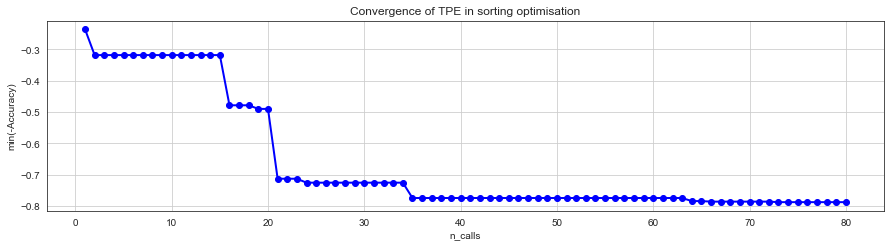

In [8]:
test.plot_convergence()

In [9]:
import spiketoolkit as st

output_folder = 'final_sorted'

sorter = 'herdingspikes'


final_parameters = {}
for i, key in enumerate(r['optimal_params']):
    if type(r['optimal_params']) is dict:
        final_parameters[key] = r['optimal_params'][key][0]
    else:
        final_parameters[key] = r['optimal_params'][i]


SorterClass = st.sorters.sorter_dict[sorter]
my_sorter = SorterClass(recording=recording, output_folder = output_folder)
my_sorter.set_params(**final_parameters)
my_sorter.run()


# Generating new position and neighbor files from data file
# Not Masking any Channels
# Sampling rate: 32000
# Localization On
# Number of recorded channels: 30
# Analysing frames: 9600000; Seconds: 300.0
# Frames before spike in cutout: 6
# Frames after spike in cutout: 32
# tcuts: 51 77
# tInc: 1000000
# Analysing frames from -51 to 1000077  (0.0%)
# Analysing frames from 999949 to 2000077  (10.4%)
# Analysing frames from 1999949 to 3000077  (20.8%)
# Analysing frames from 2999949 to 4000077  (31.2%)
# Analysing frames from 3999949 to 5000077  (41.7%)
# Analysing frames from 4999949 to 6000077  (52.1%)
# Analysing frames from 5999949 to 7000077  (62.5%)
# Analysing frames from 6999949 to 8000077  (72.9%)
# Analysing frames from 7999949 to 9000077  (83.3%)
# Analysing frames from 8999949 to 9600000  (93.8%)
# Detection completed, time taken: 0:00:15.141018
# Time per frame: 0:00:00.001577
# Time per sample: 0:00:00.000053
Loaded 36806 spikes.
Fitting dimensionality reduction using al

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    4.1s remaining:   28.7s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.3s remaining:    2.1s


Number of estimated units: 30
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/final_sorted/HS2_sorted.hdf5


[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.4s finished


20.76827278599376

In [10]:
sorting_extractor = my_sorter.get_result()


In [11]:
sorting_extractor.get_sampling_frequency()

32000.0

In [12]:
sc = st.comparison.compare_sorter_to_ground_truth(sorting_true, sorting_extractor, exhaustive_gt=True)
# why the warning below?

In [13]:
# sc
results = sc.get_performance(method='pooled_with_sum', output='dict')  
results

{'accuracy': 0.7875070343275183,
 'recall': 0.8477102011146112,
 'precision': 0.9172784478238071,
 'false_discovery_rate': 0.08272155217619297,
 'miss_rate': 0.1522897988853889,
 'misclassification_rate': 0.0}

In [14]:
sc.get_performance(method='by_unit', output='dict')  


,accuracy,recall,precision,false_discovery_rate,miss_rate,misclassification_rate
gt_unit_id,,,,,,
1,0.893715,0.937924,0.949902,0.050098,0.062076,0.0
2,0.779783,0.891089,0.861931,0.138069,0.108911,0.0
3,0.906640,0.943874,0.958304,0.041696,0.056126,0.0
4,0.000000,0.000000,NaN,NaN,1.000000,0.0
5,0.762115,0.864794,0.865206,0.134794,0.135206,0.0
6,0.785366,0.884615,0.875000,0.125000,0.115385,0.0
7,0.978610,0.982814,0.995647,0.004353,0.017186,0.0
8,0.791592,0.850579,0.919449,0.080551,0.149421,0.0
9,0.778514,0.834229,0.920991,0.079009,0.165771,0.0


In [15]:
snr = st.validation.compute_unit_SNR(recording, sorting_true)

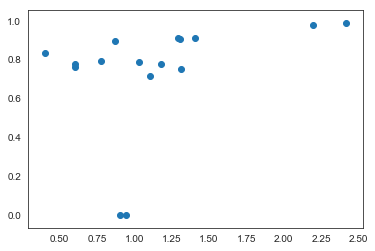

In [17]:
plt.scatter(snr, sc.get_performance(method='by_unit', output='dict')['accuracy'])